<a href="https://colab.research.google.com/github/ranjit-battewad/odysse_files/blob/master/Copy_of_Odysse_Data_Digging_Inseego.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import os
import re
import datetime
import numpy as np
pd.set_option('display.max_columns', None)

In [ ]:
data = pd.read_csv("/content/cluster_dataset_Odysse.csv",encoding='ISO-8859-1')

FileNotFoundError: [Errno 2] No such file or directory: '/content/cluster_dataset_Odysse.csv'

In [ ]:
data.head(5)

,Report_date,Report_time,VehicleReg,Location_address,Location Lat_Long,Trips_ID,Earnings,Long,Lat,Date_Time,Vehicle_Id,Driver_Id,Pick-up address,Drop off address,onjobduration_min,tripdistance,earnings per trip hour,earnings per trip Miles,Trip Status,new_time,Cluster,Hour,Month,Minutes,Day,next_trip_time,idle_time(mins),driver_name,Postcode,Ward Name,hoursOnline,earning_per_hour,Time_period,Day_Type
0,1/5/2024,6:51:00,LC18 ZDZ,Deptford Bridge (A2); SE8; in London; England;...,Long : 0ÃÂ° 1' 25.4 W Lat : 51ÃÂ° 28' 27.8 N,12464,24.59,-0.023722,51.474389,6:51:00,4,6,"24 Musgrove Road, Lewisham, London, London, En...","45 Sydney Road, Ealing, London, London, Englan...",74.983333,25.86,19.676373,0.950889,completed,6:51:00,0,6,1,51,Friday,1/5/2024 8:05,-0.983333,Ibrahim Saleh Ibrahim,SE2,Abbey Wood,7.76,12.23840206,Morning,Weekend
1,1/5/2024,8:05:00,LC18 ZDZ,45 Sydney Road; W13; in London; England; W13 9EZ;,Long : 0ÃÂ° 19' 23.2 W Lat : 51ÃÂ° 30' 24.5 N,12470,11.50,-0.323111,51.506806,8:05:00,4,6,"London W13 0FE, UK","101 Wood Ln, London, W12 7FR, GB",29.866667,8.35,23.102679,1.377246,completed,8:05:00,5,8,1,5,Friday,1/5/2024 9:44,69.133333,Ibrahim Saleh Ibrahim,SE8,Evelyn,7.76,12.23840206,Morning,Weekend
2,1/5/2024,9:44:00,LC18 ZDZ,New Cross Road (A2); SE14; in London; England;...,Long : 0ÃÂ° 1' 38.3 W Lat : 51ÃÂ° 28' 30.6 N,12479,4.60,-0.027306,51.475167,9:44:00,4,6,"17 Admiralty Close, Lewisham, London, London, ...","Trafalgar Rd, London SE10 9TS, UK",13.150000,2.95,20.988593,1.559322,completed,9:44:00,0,9,1,44,Friday,1/5/2024 16:07,369.850000,Ibrahim Saleh Ibrahim,SE2,Abbey Wood,7.76,12.23840206,Morning,Weekend
3,1/5/2024,16:07:00,LC18 ZDZ,Webber Street; SE1; in London; England; SE1 8PZ;,Long : 0ÃÂ° 6' 30.6 W Lat : 51ÃÂ° 30' 6.4 N,12510,7.26,-0.108500,51.501778,16:07:00,4,6,"157 Waterloo Rd, London, Greater London, SE1 8...","St Martin's Courtyard, Slingsby Pl, London WC2...",15.650000,2.81,27.833866,2.583630,completed,16:07:00,3,16,1,7,Friday,1/5/2024 16:42,19.350000,Ibrahim Saleh Ibrahim,WC2N,St James's,7.76,12.23840206,Afternoon,Weekend
4,1/5/2024,16:42:00,LC18 ZDZ,61 Chandos Place; WC2; in London; England; WC2...,Long : 0ÃÂ° 7' 29.4 W Lat : 51ÃÂ° 30' 36.7 N,12513,13.28,-0.124833,51.510194,16:42:00,4,6,"St Martin's Place, London, Greater London, WC1...","London W8 6NL, UK",26.766667,6.37,29.768369,2.084772,completed,16:42:00,3,16,1,42,Friday,1/5/2024 17:12,3.233333,Ibrahim Saleh Ibrahim,WC2N,St James's,7.76,12.23840206,Afternoon,Weekend


In [ ]:
cluster_driver_agg = data.groupby(['Report_date', 'Driver_Id']).agg({'onjobduration_min': 'sum', 'hoursOnline': 'mean'})
cluster_driver_agg.reset_index(inplace=True)
cluster_driver_agg

,Report_date,Driver_Id,onjobduration_min,hoursOnline
0,1/1/2024,7,250.633333,0.07
1,1/11/2024,6,218.916667,8.84
2,1/11/2024,16,421.733333,8.36
3,1/12/2024,7,343.050000,7.89
4,1/12/2024,16,475.750000,10.13
...,...,...,...,...
1658,9/9/2024,90,259.750000,6.85
1659,9/9/2024,93,47.400000,3.20
1660,9/9/2024,94,217.233333,4.17
1661,9/9/2024,95,338.216667,6.29


In [ ]:
for _,i in data.iterrows():
  data['onjobduration_hour'] = data['onjobduration_min']/60

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16487 entries, 0 to 16486
Data columns (total 35 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Report_date              16487 non-null  object 
 1   Report_time              16487 non-null  object 
 2   VehicleReg               16487 non-null  object 
 3   Location_address         16487 non-null  object 
 4   Location Lat_Long        16487 non-null  object 
 5   Trips_ID                 16487 non-null  int64  
 6   Earnings                 16487 non-null  float64
 7   Long                     16487 non-null  float64
 8   Lat                      16487 non-null  float64
 9   Date_Time                16487 non-null  object 
 10  Vehicle_Id               16487 non-null  int64  
 11  Driver_Id                16487 non-null  int64  
 12  Pick-up address          16487 non-null  object 
 13  Drop off address         16487 non-null  object 
 14  onjobduration_min     

In [ ]:
data['Time'] = pd.to_datetime(data['Date_Time'], format= '%H:%M:%S')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16487 entries, 0 to 16486
Data columns (total 36 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Report_date              16487 non-null  object        
 1   Report_time              16487 non-null  object        
 2   VehicleReg               16487 non-null  object        
 3   Location_address         16487 non-null  object        
 4   Location Lat_Long        16487 non-null  object        
 5   Trips_ID                 16487 non-null  int64         
 6   Earnings                 16487 non-null  float64       
 7   Long                     16487 non-null  float64       
 8   Lat                      16487 non-null  float64       
 9   Date_Time                16487 non-null  object        
 10  Vehicle_Id               16487 non-null  int64         
 11  Driver_Id                16487 non-null  int64         
 12  Pick-up address          16487 n

In [ ]:
data["Report_date"] = pd.to_datetime(data["Report_date"])

In [ ]:
data["new_time"]=data["Time"].dt.time

In [ ]:
data["new_time"]

,new_time
0,06:51:00
1,08:05:00
2,09:44:00
3,16:07:00
4,16:42:00
...,...
16482,16:57:28
16483,17:22:01
16484,17:54:44
16485,18:19:52


In [ ]:
# data["new_time"] = pd.to_datetime(data["Report_time"], format='%H:%M:%S').dt.time

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16487 entries, 0 to 16486
Data columns (total 35 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Report_date              16487 non-null  datetime64[ns]
 1   Report_time              16487 non-null  object        
 2   VehicleReg               16487 non-null  object        
 3   Location_address         16487 non-null  object        
 4   Location Lat_Long        16487 non-null  object        
 5   Trips_ID                 16487 non-null  int64         
 6   Earnings                 16487 non-null  float64       
 7   Long                     16487 non-null  float64       
 8   Lat                      16487 non-null  float64       
 9   Date_Time                16487 non-null  object        
 10  Vehicle_Id               16487 non-null  int64         
 11  Driver_Id                16487 non-null  float64       
 12  Pick-up address          16487 n

In [ ]:
data["Long"]

,Long
0,-0.023722
1,-0.323111
2,-0.027306
3,-0.108500
4,-0.124833
...,...
16482,0.187528
16483,0.189722
16484,0.175222
16485,0.159417


In [ ]:
data["Lat"]

,Lat
0,51.474389
1,51.506806
2,51.475167
3,51.501778
4,51.510194
...,...
16482,51.441611
16483,51.472944
16484,51.501722
16485,51.492528


In [ ]:
# import re
# def dms_to_decimal(dms_str):
#     # Extract degrees, minutes, seconds, and direction using regex
#     dms_pattern = r"(\d+)° (\d+)' ([\d.]+)\"? ([NSEW])"
#     match = re.match(dms_pattern, dms_str.strip())

#     if match:
#         degrees = int(match.group(1))
#         minutes = int(match.group(2))
#         seconds = float(match.group(3))
#         direction = match.group(4)

#         # Calculate decimal degrees
#         decimal = degrees + minutes / 60 + seconds / 3600

#         # Adjust for West and South directions
#         if direction in ['W', 'S']:
#             decimal = -decimal

#         return decimal
#     return None

# # Apply the conversion to both Longitude and Latitude columns
# data['Long'] = data['Long'].apply(dms_to_decimal)
data['Lat'] = data['Lat'].apply(dms_to_decimal)

NameError: name 'dms_to_decimal' is not defined

In [ ]:
num_data = data[["Earnings","Long","Lat","Hour","Minutes","onjobduration_min","tripdistance"]]

In [ ]:
num_data.corr()

,Earnings,Long,Lat,Hour,Minutes,onjobduration_min,tripdistance
Earnings,1.000000,0.059956,-0.084267,-0.041673,-0.017882,0.838132,0.920987
Long,0.059956,1.000000,-0.129525,0.080927,-0.002409,0.039263,0.052053
Lat,-0.084267,-0.129525,1.000000,0.010811,0.004432,-0.117344,-0.052981
Hour,-0.041673,0.080927,0.010811,1.000000,-0.043462,-0.023200,-0.042064
Minutes,-0.017882,-0.002409,0.004432,-0.043462,1.000000,-0.013218,-0.013445
onjobduration_min,0.838132,0.039263,-0.117344,-0.023200,-0.013218,1.000000,0.747361
tripdistance,0.920987,0.052053,-0.052981,-0.042064,-0.013445,0.747361,1.000000


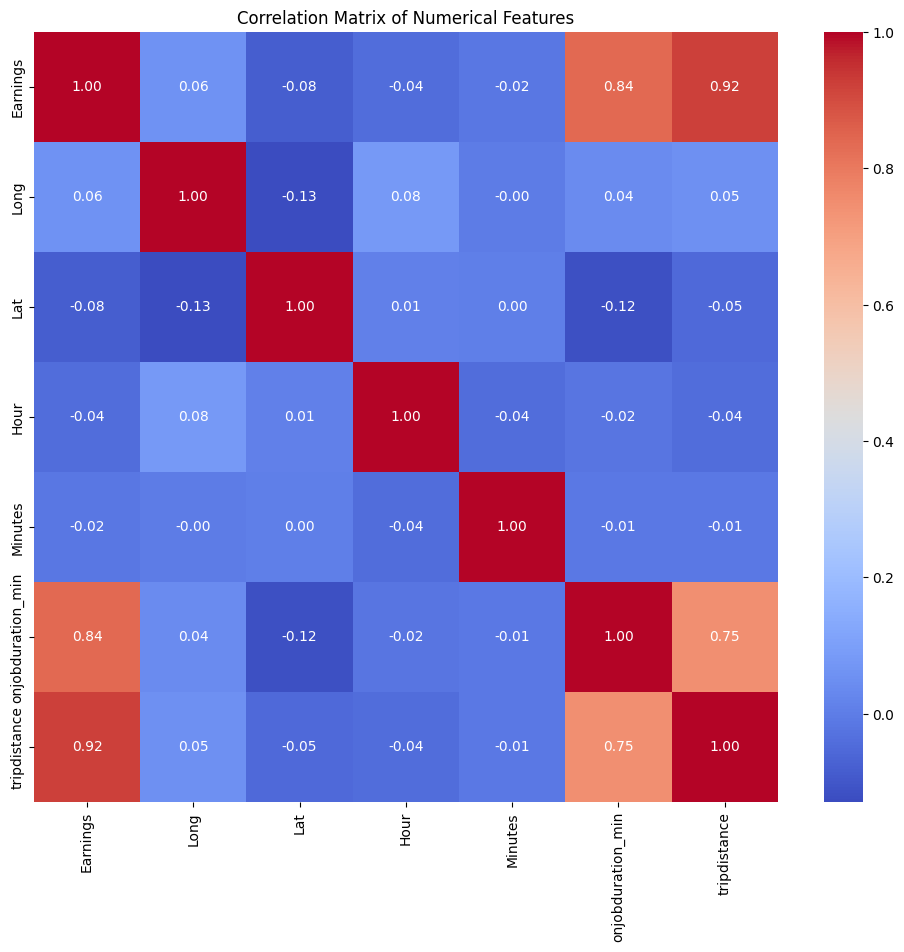

In [ ]:
plt.figure(figsize=(12, 10))
sns.heatmap(num_data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

In [ ]:
data['Hour'] = data['Time'].dt.hour

In [ ]:
data.head()

,Report_date,Report_time,VehicleReg,Location_address,Location Lat_Long,Trips_ID,Earnings,Long,Lat,Date_Time,Vehicle_Id,Driver_Id,Pick-up address,Drop off address,onjobduration_min,tripdistance,earnings per trip hour,earnings per trip Miles,Trip Status,new_time,Cluster,Hour,Month,Minutes,Day,next_trip_time,idle_time(mins),driver_name,Postcode,Ward Name,hoursOnline,earning_per_hour,Time_period,Day_Type,onjobduration_hour
0,2024-01-05,06:51:00,LC18 ZDZ,Deptford Bridge (A2); SE8; in London; England;...,Long : 0ÃÂ° 1' 25.4 W Lat : 51ÃÂ° 28' 27.8 N,12464,24.59,-0.023722,51.474389,2024-01-05 06:51:00,4,6.0,"24 Musgrove Road, Lewisham, London, London, En...","45 Sydney Road, Ealing, London, London, Englan...",74.983333,25.86,19.676373,0.950889,completed,06:51:00,0,6,1,51,Friday,2024-01-05 08:05:00,-0.983333,Ibrahim Saleh Ibrahim,SE2,Abbey Wood,7.76,12.23840206185567,Morning,Weekend,1.249722
1,2024-01-05,08:05:00,LC18 ZDZ,45 Sydney Road; W13; in London; England; W13 9EZ;,Long : 0ÃÂ° 19' 23.2 W Lat : 51ÃÂ° 30' 24.5 N,12470,11.50,-0.323111,51.506806,2024-01-05 08:05:00,4,6.0,"London W13 0FE, UK","101 Wood Ln, London, W12 7FR, GB",29.866667,8.35,23.102679,1.377246,completed,08:05:00,5,8,1,5,Friday,2024-01-05 09:44:00,69.133333,Ibrahim Saleh Ibrahim,SE8,Evelyn,7.76,12.23840206185567,Morning,Weekend,0.497778
2,2024-01-05,09:44:00,LC18 ZDZ,New Cross Road (A2); SE14; in London; England;...,Long : 0ÃÂ° 1' 38.3 W Lat : 51ÃÂ° 28' 30.6 N,12479,4.60,-0.027306,51.475167,2024-01-05 09:44:00,4,6.0,"17 Admiralty Close, Lewisham, London, London, ...","Trafalgar Rd, London SE10 9TS, UK",13.150000,2.95,20.988593,1.559322,completed,09:44:00,0,9,1,44,Friday,2024-01-05 16:07:00,369.850000,Ibrahim Saleh Ibrahim,SE2,Abbey Wood,7.76,12.23840206185567,Morning,Weekend,0.219167
3,2024-01-05,16:07:00,LC18 ZDZ,Webber Street; SE1; in London; England; SE1 8PZ;,Long : 0ÃÂ° 6' 30.6 W Lat : 51ÃÂ° 30' 6.4 N,12510,7.26,-0.108500,51.501778,2024-01-05 16:07:00,4,6.0,"157 Waterloo Rd, London, Greater London, SE1 8...","St Martin's Courtyard, Slingsby Pl, London WC2...",15.650000,2.81,27.833866,2.583630,completed,16:07:00,3,16,1,7,Friday,2024-01-05 16:42:00,19.350000,Ibrahim Saleh Ibrahim,WC2N,St James's,7.76,12.23840206185567,Afternoon,Weekend,0.260833
4,2024-01-05,16:42:00,LC18 ZDZ,61 Chandos Place; WC2; in London; England; WC2...,Long : 0ÃÂ° 7' 29.4 W Lat : 51ÃÂ° 30' 36.7 N,12513,13.28,-0.124833,51.510194,2024-01-05 16:42:00,4,6.0,"St Martin's Place, London, Greater London, WC1...","London W8 6NL, UK",26.766667,6.37,29.768369,2.084772,completed,16:42:00,3,16,1,42,Friday,2024-01-05 17:12:00,3.233333,Ibrahim Saleh Ibrahim,WC2N,St James's,7.76,12.23840206185567,Afternoon,Weekend,0.446111


In [ ]:
#data['Month'] = data['Date_Time'].dt.month

In [ ]:
data['Minutes'] = data['Time'].dt.minute

In [ ]:
data.head(5)

,Report_date,Report_time,VehicleReg,Location_address,Location Lat_Long,Trips_ID,Earnings,Long,Lat,Date_Time,...,onjobduration_min,tripdistance,earnings per trip hour,earnings per trip Miles,Trip Status,new_time,Cluster,Hour,Month,Minutes
0,2024-01-01,00:29:00,SL20 EYR,Roundabout; SE28; in London; England; SE28 8EU;,Long : 0Â° 7' 23.6 E Lat : 51Â° 30' 37.3 N,12306,8.86,0.123222,51.510361,2024-01-01 00:29:00,...,25.083333,4.81,21.193355,1.841996,completed,00:29:00,0,0,1,29
1,2024-01-01,00:58:00,SL20 EYR,Roundabout; in Welling; England; DA16 1BP;,Long : 0Â° 6' 42.7 E Lat : 51Â° 28' 23.3 N,12308,12.65,0.111861,51.473139,2024-01-01 00:58:00,...,14.866667,5.72,51.053812,2.211538,completed,00:58:00,0,0,1,58
2,2024-01-01,01:13:00,SL20 EYR,Wolvercote Road; SE2; in London; England; DA18...,Long : 0Â° 7' 42.2 E Lat : 51Â° 29' 45.9 N,12309,14.15,0.128389,51.496083,2024-01-01 01:13:00,...,45.116667,11.51,18.817880,1.229366,completed,01:13:00,0,1,1,13
3,2024-01-01,01:40:00,SL20 EYR,Central Parade (A222); in Sidcup; England; DA1...,Long : 0Â° 6' 9.5 E Lat : 51Â° 25' 57 N,12310,18.93,0.102639,51.432500,2024-01-01 01:40:00,...,36.150000,8.97,31.419087,2.110368,completed,01:40:00,-1,1,1,40
4,2024-01-01,02:05:00,SL20 EYR,Market Square (A222); in Bromley; England; BR1...,Long : 0Â° 0' 54.5 E Lat : 51Â° 24' 20.9 N,12311,22.70,0.015139,51.405806,2024-01-01 02:05:00,...,48.566667,8.88,28.043926,2.556306,completed,02:05:00,-1,2,1,5


In [ ]:
# data['Minutes'] = data['Date_Time'].dt.minute

In [ ]:
# data['Day'] = data['Time'].dt.day_name()

In [ ]:
data.head(5)

,Report_date,Report_time,VehicleReg,Location_address,Location Lat_Long,Trips_ID,Earnings,Long,Lat,Date_Time,...,tripdistance,earnings per trip hour,earnings per trip Miles,Trip Status,new_time,Cluster,Hour,Month,Minutes,Day
0,2024-01-01,00:29:00,SL20 EYR,Roundabout; SE28; in London; England; SE28 8EU;,Long : 0Â° 7' 23.6 E Lat : 51Â° 30' 37.3 N,12306,8.86,0.123222,51.510361,2024-01-01 00:29:00,...,4.81,21.193355,1.841996,completed,00:29:00,0,0,1,29,Monday
1,2024-01-01,00:58:00,SL20 EYR,Roundabout; in Welling; England; DA16 1BP;,Long : 0Â° 6' 42.7 E Lat : 51Â° 28' 23.3 N,12308,12.65,0.111861,51.473139,2024-01-01 00:58:00,...,5.72,51.053812,2.211538,completed,00:58:00,0,0,1,58,Monday
2,2024-01-01,01:13:00,SL20 EYR,Wolvercote Road; SE2; in London; England; DA18...,Long : 0Â° 7' 42.2 E Lat : 51Â° 29' 45.9 N,12309,14.15,0.128389,51.496083,2024-01-01 01:13:00,...,11.51,18.817880,1.229366,completed,01:13:00,0,1,1,13,Monday
3,2024-01-01,01:40:00,SL20 EYR,Central Parade (A222); in Sidcup; England; DA1...,Long : 0Â° 6' 9.5 E Lat : 51Â° 25' 57 N,12310,18.93,0.102639,51.432500,2024-01-01 01:40:00,...,8.97,31.419087,2.110368,completed,01:40:00,-1,1,1,40,Monday
4,2024-01-01,02:05:00,SL20 EYR,Market Square (A222); in Bromley; England; BR1...,Long : 0Â° 0' 54.5 E Lat : 51Â° 24' 20.9 N,12311,22.70,0.015139,51.405806,2024-01-01 02:05:00,...,8.88,28.043926,2.556306,completed,02:05:00,-1,2,1,5,Monday


In [ ]:
data.shape

(17545, 25)

In [ ]:
data.columns

Index(['Report_date', 'Report_time', 'VehicleReg', 'Location_address',
       'Location Lat_Long', 'Trips_ID', 'Earnings', 'Long', 'Lat', 'Date_Time',
       'Vehicle_Id', 'Driver_Id', 'Pick-up address', 'Drop off address',
       'onjobduration_min', 'tripdistance', 'earnings per trip hour',
       'earnings per trip Miles', 'Trip Status', 'new_time', 'Cluster', 'Hour',
       'Month', 'Minutes', 'Day', 'next_trip_time', 'idle_time(mins)',
       'driver_name', 'Postcode', 'Ward Name', 'hoursOnline',
       'earning_per_hour', 'Time_period', 'Day_Type', 'onjobduration_hour',
       'Time'],
      dtype='object')

In [ ]:
data['onjobduration_min'].mean()

30.764167728164736

In [ ]:
data['tripdistance'].mean()

8.981160914660034

In [ ]:
data['onjobduration_min'].max()

247.1166667

In [ ]:
# data_rush=pd.read_csv("/content/best_hours(ride_tradeof_earnings).csv",encoding='ISO-8859-1')
# data_rush

FileNotFoundError: [Errno 2] No such file or directory: '/content/best_hours(ride_tradeof_earnings).csv'

In [ ]:
data.groupby('Hour').agg({'Trips_ID':'count','Earnings':'mean'}).sort_values(by = 'Earnings', ascending = False)

,Trips_ID,Earnings
Hour,,
5,163,18.921963
4,96,16.955625
14,920,14.194913
15,1003,14.017049
8,744,13.980995
1,123,13.840813
12,919,13.454233
7,683,13.438990
13,971,13.291370


In [ ]:
result = data.groupby('Hour').agg(
    ride_count=('Trips_ID', 'size'),  # Count of rides
    average_earnings=('Earnings', 'mean'),
).reset_index()

# Sort by average_earnings in descending order
result = result.sort_values(by='average_earnings', ascending=False)

print(result)

    Hour  ride_count  average_earnings
5      5         116         20.357103
4      4         100         16.440430
1      1          71         14.485000
23    23         123         14.393033
10    10         598         13.676855
2      2          56         13.423571
0      0          87         12.881149
13    13         450         12.845724
6      6         325         12.796677
11    11         412         12.723186
22    22         205         12.440197
8      8         434         12.216262
15    15         404         12.073147
7      7         439         12.000000
14    14         374         11.939919
12    12         394         11.896010
16    16         460         11.891148
17    17         564         11.821733
18    18         578         11.728049
3      3          59         11.585294
21    21         270         11.479699
19    19         533         10.923340
20    20         434         10.840257
9      9         263          8.410506


In [ ]:
result1 = data.groupby('Driver_Id').agg(
    ride_count=('Trips_ID', 'size'),  # Count of rides
    average_earnings=('Earnings', 'mean'),
).reset_index()

# Sort by average_earnings in descending order
result = result.sort_values(by='average_earnings', ascending=False)

print(result)

    Hour  ride_count  average_earnings
5      5         116         20.357103
4      4         100         16.440430
1      1          71         14.485000
23    23         123         14.393033
10    10         598         13.676855
2      2          56         13.423571
0      0          87         12.881149
13    13         450         12.845724
6      6         325         12.796677
11    11         412         12.723186
22    22         205         12.440197
8      8         434         12.216262
15    15         404         12.073147
7      7         439         12.000000
14    14         374         11.939919
12    12         394         11.896010
16    16         460         11.891148
17    17         564         11.821733
18    18         578         11.728049
3      3          59         11.585294
21    21         270         11.479699
19    19         533         10.923340
20    20         434         10.840257
9      9         263          8.410506


In [ ]:
data.columns

Index(['Report_date', 'Report_time', 'VehicleReg', 'Location_address',
       'Location Lat_Long', 'Trips_ID', 'Earnings', 'Long', 'Lat', 'Date_Time',
       'Vehicle_Id', 'Driver_Id', 'Pick-up address', 'Drop off address',
       'onjobduration_min', 'tripdistance', 'earnings per trip hour',
       'earnings per trip Miles', 'Trip Status', 'new_time', 'Cluster', 'Hour',
       'Month', 'Minutes', 'Day'],
      dtype='object')

In [ ]:
result1 = data.groupby(['Hour', 'Driver_Id']).agg(
    rides_by_driver=('Trips_ID', 'size')  # Count rides taken by each driver
).reset_index()

result1

,Hour,Driver_Id,rides_by_driver
0,0,6.0,22
1,0,7.0,2
2,0,25.0,46
3,0,40.0,53
4,0,42.0,2
...,...,...,...
899,23,85.0,11
900,23,87.0,1
901,23,89.0,3
902,23,92.0,14


In [ ]:
merged_result = pd.merge(result, result1, on='Hour')

In [ ]:
final_result = merged_result.sort_values(by= 'ride_count', ascending=False)

In [ ]:
final_result

,Hour,ride_count,average_earnings,Driver_Id,rides_by_driver
42,10,598,13.676855,52.0,18
44,10,598,13.676855,57.0,2
34,10,598,13.676855,16.0,91
35,10,598,13.676855,22.0,1
37,10,598,13.676855,25.0,131
...,...,...,...,...,...
332,3,59,11.585294,25.0,43
54,2,56,13.423571,6.0,13
56,2,56,13.423571,25.0,38
57,2,56,13.423571,52.0,3


In [ ]:
driver_rides_per_hour = data.groupby(['Hour', 'Driver_Id']).agg(
    rides_by_driver=('Trips_ID', 'size')
).reset_index()
print(driver_rides_per_hour)

     Hour  Driver_Id  rides_by_driver
0       0        6.0               22
1       0        7.0                2
2       0       25.0               37
3       0       35.0                1
4       0       52.0                4
..    ...        ...              ...
419    23       53.0                3
420    23       60.0                2
421    23       64.0                3
422    23       85.0                8
423    23       87.0                1

[424 rows x 3 columns]


In [ ]:
# hourly_avg_earnings = data.groupby('Hour').agg(
#     average_earnings=('Earnings', 'mean')
# ).reset_index()

# # Step 2: Count the number of rides taken by each driver per hour
# driver_rides_per_hour = data.groupby(['Hour', 'Driver_Id']).agg(
#     rides_by_driver=('Trips_ID', 'size')
# ).reset_index()

# # Step 3: Combine driver-wise ride counts into a single string for each hour
# driver_rides_per_hour['driver_info'] = driver_rides_per_hour.apply(
#     lambda row: f"DriverID {row['Driver_Id']}: {row['rides_by_driver']} rides", axis=1)

# # Step 4: Group the driver info by Hour and aggregate the text for each driver
# driver_summary = driver_rides_per_hour.groupby('Hour').agg(
#     driver_details=('driver_info', ', '.join)
# ).reset_index()

# # Step 5: Merge average earnings with driver details
# final_result = pd.merge(hourly_avg_earnings, driver_summary, on='Hour')

# # Step 6: Format the result to show Hours, Average Earnings, and Driver Ride Counts
# final_result['output'] = final_result.apply(
#     lambda row: f"At {row['Hour']} the average earning was {row['average_earnings']:.2f}, {row['driver_details']}", axis=1)

# # Display the final result
# for entry in final_result['output']:
#     print(entry)

In [ ]:
# hourly_avg_earnings = data.groupby('Hour').agg(
#     average_earnings=('Earnings', 'mean')
# ).reset_index()

# # Step 2: Count the number of rides taken by each driver per hour
# driver_rides_per_hour = data.groupby(['Hour', 'Driver_Id']).agg(
#     rides_by_driver=('Trips_ID', 'size')
# ).reset_index()

# # Step 3: Pivot the data to have Driver_IDs as columns
# pivoted_data = driver_rides_per_hour.pivot(index='Hour', columns='Driver_Id', values='rides_by_driver')

# # Step 4: Merge the pivoted data (driver rides) with the average earnings per hour
# final_result = pd.merge(hourly_avg_earnings, pivoted_data, on='Hour')

# # Display the final DataFrame
# print(final_result)

In [ ]:
from sklearn.cluster import dbscan,DBSCAN
import folium
from folium.plugins import MarkerCluster

In [ ]:
data.head(2)

,Report_date,Report_time,VehicleReg,Location_address,Location Lat_Long,Trips_ID,Earnings,Long,Lat,Date_Time,...,tripdistance,earnings per trip hour,earnings per trip Miles,Trip Status,new_time,Cluster,Hour,Month,Minutes,Day
0,2024-01-01,00:29:00,SL20 EYR,Roundabout; SE28; in London; England; SE28 8EU;,Long : 0Â° 7' 23.6 E Lat : 51Â° 30' 37.3 N,12306,8.86,0.123222,51.510361,2024-01-01 00:29:00,...,4.81,21.193355,1.841996,completed,00:29:00,0,0,1,29,Monday
1,2024-01-01,00:58:00,SL20 EYR,Roundabout; in Welling; England; DA16 1BP;,Long : 0Â° 6' 42.7 E Lat : 51Â° 28' 23.3 N,12308,12.65,0.111861,51.473139,2024-01-01 00:58:00,...,5.72,51.053812,2.211538,completed,00:58:00,0,0,1,58,Monday


In [ ]:
data.isnull().sum()

,0
Report_date,0
Report_time,0
VehicleReg,0
Location_address,0
Location Lat_Long,0
Trips_ID,0
Earnings,0
Long,0
Lat,0
Date_Time,0


In [ ]:
data=data.dropna(subset = ['Earnings'])

In [ ]:
data =data.dropna(subset = ['Driver_Id'])

In [ ]:
coordinates = data[['Long','Lat']].values

In [ ]:
from sklearn.cluster import dbscan,DBSCAN
import folium
from folium.plugins import MarkerCluster

In [ ]:
dbs = DBSCAN(eps = .01, min_samples=30, algorithm='ball_tree').fit(coordinates)
data['Cluster'] = dbs.labels_

In [ ]:
# def dms_to_decimal(dms_str):
#     dms_pattern = r"(\d+)[^\d]+(\d+)[^\d]+([\d.]+)[^\d]*([NSEW])"
#     match = re.search(dms_pattern, dms_str.strip())  # Using search instead of match to allow more flexibility

#     if match:
#         degrees = int(match.group(1))
#         minutes = int(match.group(2))
#         seconds = float(match.group(3))
#         direction = match.group(4)
#         decimal = degrees + minutes / 60 + seconds / 3600

#         if direction in ['W', 'S']:
#             decimal = -decimal

#         return decimal
#     return None
# # Apply the conversion function to the 'Long' and 'Lat' columns
# data['Long'] = data['Long'].apply(dms_to_decimal)
# data['Lat'] = data['Lat'].apply(dms_to_decimal)

# # Now create the coordinates array after conversion
# coordinates = data[['Long','Lat']].values

# # Apply DBSCAN
# dbs = DBSCAN(eps = .01, min_samples=60, algorithm='ball_tree').fit(coordinates)
# data['Cluster'] = dbs.labels_

In [ ]:
data["Long"]

,Long
0,0.123222
1,0.111861
2,0.128389
3,0.102639
4,0.015139
...,...
17540,0.012750
17541,0.193833
17542,0.001944
17543,-0.007083


In [ ]:
# coordinates = data[['Long','Lat']].values

In [ ]:
# data.to_csv("Odysse_data_digging.csv",index=False)

In [ ]:
# dbs = DBSCAN(eps = .01, min_samples=60, algorithm='ball_tree').fit(coordinates)
# data['Cluster'] = dbs.labels_

ValueError: could not convert string to float: "0Â° 7' 23.6 E "

In [ ]:
data.head()

,Report_date,Report_time,VehicleReg,Location_address,Location Lat_Long,Trips_ID,Earnings,Long,Lat,Date_Time,...,tripdistance,earnings per trip hour,earnings per trip Miles,Trip Status,new_time,Hour,Month,Minutes,Day,Cluster
0,2024-01-01,0:29,SL20 EYR,Roundabout; SE28; in London; England; SE28 8EU;,Long : 0° 7' 23.6 E Lat : 51° 30' 37.3 N,12306,8.860000,0.123222,51.510361,2024-01-01 00:29:00,...,4.81,21.193356,1.841996,completed,00:29:00,0,1,29,Monday,0
1,2024-01-01,0:58,SL20 EYR,Wickham Lane (A209); in Welling; England; DA16...,Long : 0° 6' 31.5 E Lat : 51° 28' 31.8 N,12308,12.650000,0.108750,51.475498,2024-01-01 00:58:00,...,5.72,51.053810,2.211539,completed,00:58:00,0,1,58,Monday,-1
2,2024-01-01,1:13,SL20 EYR,Wolvercote Road; SE2; in London; England; DA18...,Long : 0° 7' 42.2 E Lat : 51° 29' 45.9 N,12309,14.150000,0.128389,51.496082,2024-01-01 01:13:00,...,11.51,18.817879,1.229366,completed,01:13:00,1,1,13,Monday,0
3,2024-01-01,1:48,SL20 EYR,St Pauls Cray Road (A208); in Chislehurst; Eng...,Long : 0° 4' 46.1 E Lat : 51° 24' 33.3 N,12310,18.930000,0.079472,51.409248,2024-01-01 01:48:00,...,8.97,31.419086,2.110368,completed,01:48:00,1,1,48,Monday,-1
4,2024-01-01,2:16,SL20 EYR,6 Creswell Drive; in Beckenham; England; BR3 3FX;,Long : 0° 1' 9.4 W Lat : 51° 23' 30.7 N,12311,22.700001,-0.019278,51.391861,2024-01-01 02:16:00,...,8.88,28.043926,2.556306,completed,02:16:00,2,1,16,Monday,-1


In [ ]:
data['Cluster'].unique()

array([ 0,  5,  3, -1, 11,  6, 12, 13, 14,  9,  8, 35, 10,  2,  7, 15, 16,
       32,  1,  4, 19, 20, 18, 30, 22, 24, 21, 17, 28, 23, 29, 26, 27, 25,
       34, 31, 33])

In [ ]:
cluster_counts = data.groupby('Cluster').size()
cluster_counts.sort_values(ascending = False)

,0
Cluster,
0,7035
-1,3845
5,1420
3,1301
26,423
31,244
20,225
15,191
25,190


In [ ]:
res = data.groupby('Cluster')['Earnings'].mean().reset_index()
res = res.sort_values(by = "Earnings", ascending = False)
res

,Cluster,Earnings
15,14,36.967347
24,23,35.480250
33,32,26.631818
21,20,25.688978
29,28,18.764286
4,3,14.634581
23,22,14.599375
25,24,14.530175
31,30,14.516429
36,35,14.508667


In [ ]:
res.to_csv('cluster_earnings.csv', index = False)

In [ ]:
file4 = res.to_csv('cluster_earnings.csv', index = False)
files.download('cluster_earnings.csv')

AttributeError: 'NoneType' object has no attribute 'download'

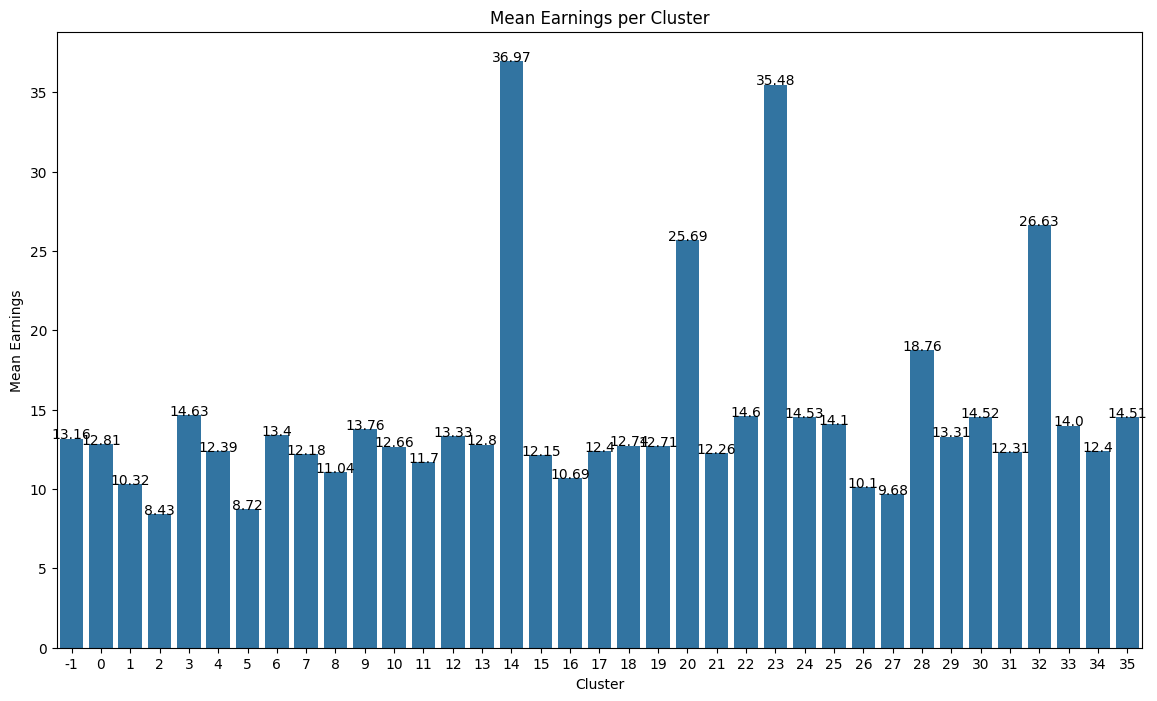

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Group by cluster and calculate the mean of earnings
res = data.groupby('Cluster')['Earnings'].mean().reset_index()

plt.figure(figsize = (14,8))
# Create a bar plot
barplot = sns.barplot(x='Cluster', y='Earnings', width = 0.8, data=res)

# Add labels to each bar
for index, row in res.iterrows():
    barplot.text(index, row.Earnings, round(row.Earnings, 2), color='black', ha="center")

# Add labels and title
plt.xlabel('Cluster')
plt.ylabel('Mean Earnings')
plt.title('Mean Earnings per Cluster')

# Show the plot
plt.show()

In [ ]:
data.head(2)

,Report_date,Report_time,VehicleReg,Location_address,Location Lat_Long,Trips_ID,Earnings,Long,Lat,Date_Time,...,tripdistance,earnings per trip hour,earnings per trip Miles,Trip Status,new_time,Hour,Month,Minutes,Day,Cluster
0,2024-01-01,0:29,SL20 EYR,Roundabout; SE28; in London; England; SE28 8EU;,Long : 0° 7' 23.6 E Lat : 51° 30' 37.3 N,12306,8.86,0.123222,51.510361,2024-01-01 00:29:00,...,4.81,21.193356,1.841996,completed,00:29:00,0,1,29,Monday,0
1,2024-01-01,0:58,SL20 EYR,Wickham Lane (A209); in Welling; England; DA16...,Long : 0° 6' 31.5 E Lat : 51° 28' 31.8 N,12308,12.65,0.108750,51.475498,2024-01-01 00:58:00,...,5.72,51.053810,2.211539,completed,00:58:00,0,1,58,Monday,-1


In [ ]:
res1 = data.groupby('Cluster')['tripdistance'].mean().reset_index()
res1 = (res1).sort_values(by='tripdistance',ascending = False)
print(res1)

    Cluster  tripdistance
21       20     32.025610
20       19     20.122667
22       21     13.186333
5         4     10.542667
16       15     10.502174
1         0     10.434790
17       16      9.945882
13       12      9.913594
15       14      9.912500
10        9      9.780957
0        -1      9.560036
11       10      9.303163
6         5      8.783285
14       13      8.608947
4         3      8.601390
2         1      8.155862
18       17      7.986667
19       18      7.478182
12       11      7.201463
9         8      7.173243
3         2      6.264615
7         6      6.016339
8         7      5.549618


In [ ]:
from google.colab import files

In [ ]:
file = res1.to_csv('Cluster_Earning Data.csv', index = False)
files.download('Cluster_Earning Data.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

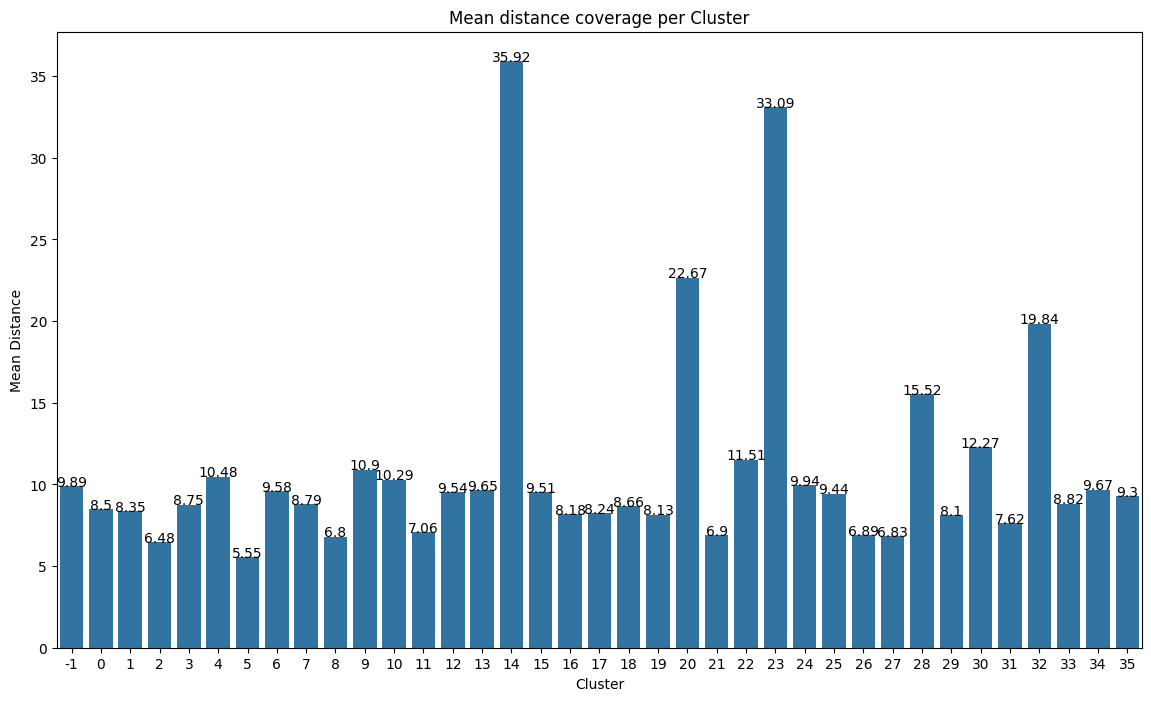

In [ ]:
plt.figure(figsize = (14,8))
res1 = data.groupby('Cluster')['tripdistance'].mean().reset_index()
bplot = sns.barplot(x='Cluster', y= 'tripdistance', data =res1)

for index,row in res1.iterrows():
  bplot.text(index,row.tripdistance,round(row.tripdistance,2), ha ='center')


plt.xlabel('Cluster')
plt.ylabel('Mean Distance')
plt.title('Mean distance coverage per Cluster')

# Show the plot
plt.show()

In [ ]:
res2 = data.groupby('Cluster')['earnings per trip hour'].mean().reset_index()
res2 = res2.sort_values(by ='earnings per trip hour', ascending = False)
# bplot = sns.barplot(x='Cluster', y= 'earnings per trip hour', data =res1)
print(res2)

    Cluster  earnings per trip hour
21       20               34.772690
22       21               27.555325
19       18               27.275937
14       13               27.012437
2         1               26.810326
9         8               26.742184
18       17               26.649215
11       10               26.619759
13       12               26.602313
0        -1               26.168313
4         3               25.803586
3         2               25.781607
10        9               25.627394
1         0               25.283203
5         4               25.234740
20       19               24.379769
6         5               24.259875
12       11               24.247811
16       15               24.228182
8         7               24.081767
7         6               23.953571
15       14               23.807825
17       16               22.949679


In [ ]:
data.columns

Index(['Report_date', 'Report_time', 'VehicleReg', 'Location_address',
       'Location Lat_Long', 'Trips_ID', 'Earnings', 'Long', 'Lat', 'Date_Time',
       'Vehicle_Id', 'Driver_Id', 'Pick-up address', 'Drop off address',
       'onjobduration_min', 'tripdistance', 'earnings per trip hour',
       'earnings per trip Miles', 'Trip Status', 'new_time', 'Hour', 'Month',
       'Minutes', 'Day', 'Cluster'],
      dtype='object')

In [ ]:
res3 = data.groupby('Cluster')['onjobduration_min'].mean().reset_index()
res3 = res3.sort_values(by = 'onjobduration_min', ascending = False)
print(res3)

    Cluster  onjobduration_min
21       20          63.278455
20       19          39.069445
22       21          35.532778
17       16          34.567974
4         3          34.029487
16       15          33.805435
10        9          33.750355
6         5          33.252433
5         4          32.339630
12       11          30.359350
11       10          30.267871
15       14          30.222348
13       12          29.904254
1         0          28.704062
9         8          28.494595
0        -1          28.273021
14       13          24.252632
2         1          23.217816
18       17          22.967593
8         7          22.879089
7         6          22.411020
19       18          21.499432
3         2          19.392308


In [ ]:
res4 = data.groupby('Hour')['onjobduration_min'].mean().reset_index()
res4 = res4.sort_values(by = 'onjobduration_min', ascending = False)
print(res4)

    Hour  onjobduration_min
5      5          33.742960
10    10          32.800084
4      4          32.285000
11    11          31.004288
13    13          30.881222
14    14          30.676203
15    15          30.547979
12    12          29.992090
16    16          29.970543
17    17          29.621749
7      7          29.256074
23    23          29.056640
8      8          28.962558
3      3          28.729096
18    18          28.240583
22    22          27.407886
6      6          27.005093
21    21          25.490556
1      1          25.147887
19    19          25.137649
0      0          24.610536
2      2          24.593750
20    20          24.473925
9      9          20.132256


In [ ]:
result1 = data.groupby('Driver_Id').agg(
    ride_count=('Trips_ID', 'size'),  # Count of rides
    average_earnings=('Earnings', 'mean'),
).reset_index()

# Sort by average_earnings in descending order
result = result.sort_values(by='average_earnings', ascending=False)

print(result)

    Hour  ride_count  average_earnings
5      5         116         20.357103
4      4         100         16.440430
1      1          71         14.485000
23    23         123         14.393033
10    10         598         13.676855
2      2          56         13.423571
0      0          87         12.881149
13    13         450         12.845724
6      6         325         12.796677
11    11         412         12.723186
22    22         205         12.440197
8      8         434         12.216262
15    15         404         12.073147
7      7         439         12.000000
14    14         374         11.939919
12    12         394         11.896010
16    16         460         11.891148
17    17         564         11.821733
18    18         578         11.728049
3      3          59         11.585294
21    21         270         11.479699
19    19         533         10.923340
20    20         434         10.840257
9      9         263          8.410506


In [ ]:
data.columns

Index(['Report_date', 'Report_time', 'VehicleReg', 'Location_address',
       'Location Lat_Long', 'Trips_ID', 'Earnings', 'Long', 'Lat', 'Date_Time',
       'Vehicle_Id', 'Driver_Id', 'Pick-up address', 'Drop off address',
       'onjobduration_min', 'tripdistance', 'earnings per trip hour',
       'earnings per trip Miles', 'Trip Status', 'new_time', 'Hour', 'Month',
       'Minutes', 'Day', 'Cluster'],
      dtype='object')

In [ ]:
result5 = data.groupby('Cluster').agg(
    earnings = ('Earnings','mean'),
    mean_distance_covered= ('tripdistance', 'mean'),
    rides_count = ('Trips_ID', 'size'),
    time_spent = ('onjobduration_min','mean')
)

result5 = result5.sort_values(by = 'earnings', ascending = False)

print(result5)

          earnings  mean_distance_covered  rides_count  time_spent
Cluster                                                           
 20      34.317073              32.025610           41   63.278455
 19      20.091333              20.122667           30   39.069445
 21      16.704667              13.186333           30   35.532778
 3       14.530536               8.601390         1417   34.029487
 9       13.529032               9.780957           94   33.750355
 5       13.495630               8.783285          137   33.252433
 12      13.227403               9.913594          192   29.904254
 10      13.170000               9.303163          332   30.267871
 15      12.899762              10.502174           46   33.805435
 16      12.769200               9.945882           51   34.567974
 14      12.393823               9.912500           44   30.222348
 4       12.315909              10.542667           45   32.339630
-1       12.288616               9.560036         3339   28.27

In [ ]:
df = pd.DataFrame(result5)
df

,earnings,mean_distance_covered,rides_count,time_spent
Cluster,,,,
20,34.317073,32.025610,41,63.278455
19,20.091333,20.122667,30,39.069445
21,16.704667,13.186333,30,35.532778
3,14.530536,8.601390,1417,34.029487
9,13.529032,9.780957,94,33.750355
5,13.495630,8.783285,137,33.252433
12,13.227403,9.913594,192,29.904254
10,13.170000,9.303163,332,30.267871
15,12.899762,10.502174,46,33.805435


In [ ]:
result6 = data.groupby('Hour').agg(
    earnings = ('Earnings','mean'),
    mean_distance_covered= ('tripdistance', 'mean'),
    rides_count = ('Trips_ID', 'size'),
    time_spent = ('onjobduration_min','mean')
)

result6 = pd.DataFrame(result6.sort_values(by = 'earnings', ascending = False))

print(result6)

       earnings  mean_distance_covered  rides_count  time_spent
Hour                                                           
5     20.357103              16.372327          116   33.742960
4     16.440430              13.795500          100   32.285000
1     14.485000               9.593803           71   25.147887
23    14.393033              10.567073          123   29.056640
10    13.676855              10.676789          598   32.800084
2     13.423571              10.080536           56   24.593750
0     12.881149               9.310575           87   24.610536
13    12.845724               9.003533          450   30.881222
6     12.796677              10.218827          324   27.005093
11    12.723186               9.369976          412   31.004288
22    12.440197               9.157854          205   27.407886
8     12.216262               8.138917          434   28.962558
15    12.073147               8.535371          404   30.547979
7     12.000000               8.395604  

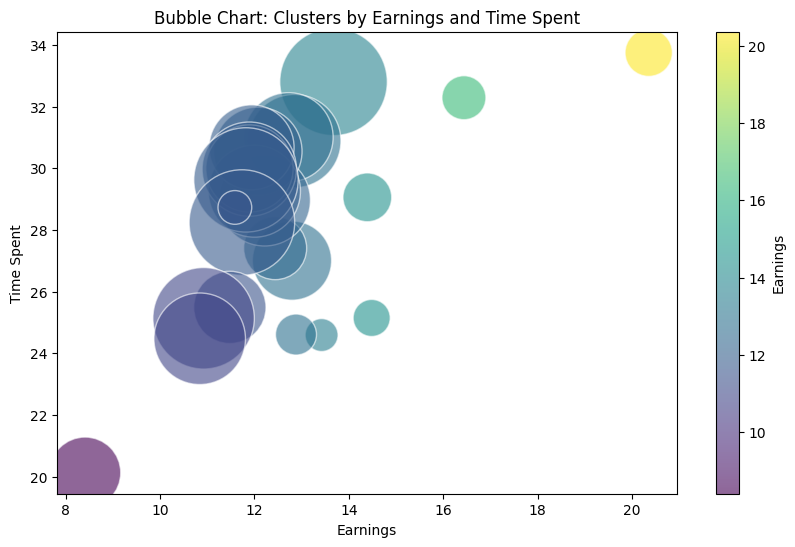

In [ ]:


# Create Bubble Chart
plt.figure(figsize=(10, 6))

# Scatter Plot where 'rides_count' determines bubble size, and color represents 'earnings'
plt.scatter(result6.earnings, result6.time_spent,
            s=result6.rides_count * 10,  # Adjust bubble size (multiply by 10 to scale up)
            c=result6.earnings, cmap='viridis', alpha=0.6, edgecolors='w')

plt.title('Bubble Chart: Clusters by Earnings and Time Spent')
plt.xlabel('Earnings')
plt.ylabel('Time Spent')

# # Add cluster labels next to the bubbles
# for i in range(len(df)):
#     plt.text(result6.earnings[i], result6.time_spent[i], data['Cluster'][i], fontsize=9)

plt.colorbar(label='Earnings')
plt.show()

In [ ]:
cluster_agg = data.groupby('Cluster').agg(
    time_spent =('onjobduration_min','mean'),
    mean_distance_covered= ('tripdistance', 'mean')
).reset_index()




<ipython-input-61-3fa59775761e>:2: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(cluster_agg['Cluster'],cluster_agg['time_spent'],


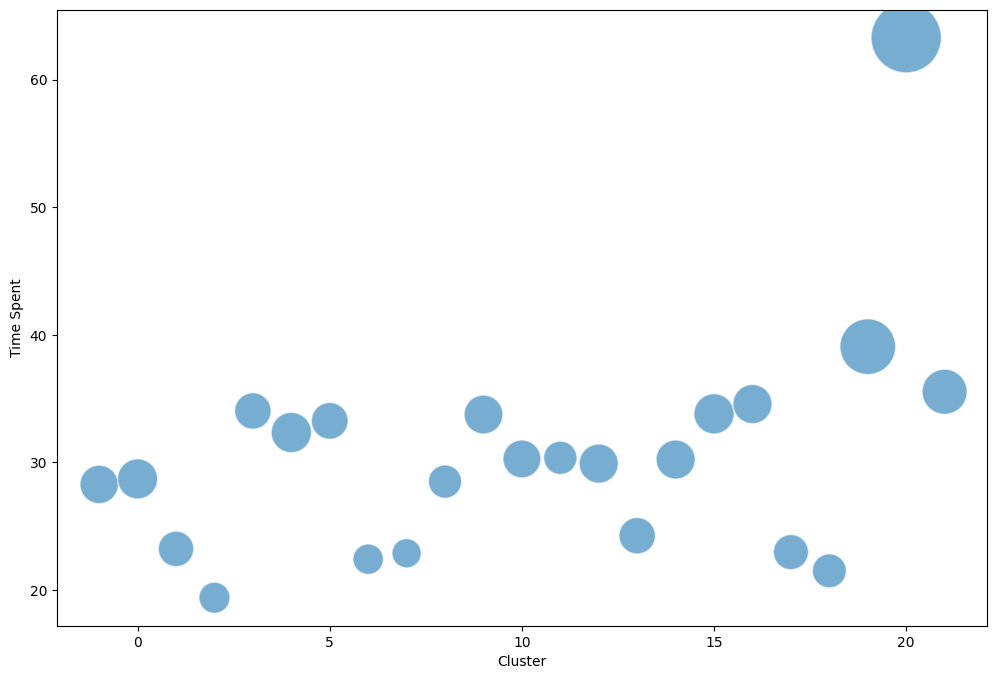

In [ ]:
plt.figure(figsize = (12,8))
plt.scatter(cluster_agg['Cluster'],cluster_agg['time_spent'],
            s= cluster_agg['mean_distance_covered']*80,  cmap='plasma', alpha=0.6, edgecolors='w')

plt.xlabel('Cluster')
plt.ylabel('Time Spent')
plt.show()

In [ ]:
timedata= data.groupby(['Cluster','Hour']).agg(
    rides_count = ('Trips_ID', 'size')).reset_index()

In [ ]:
pt =timedata.pivot(index = 'Cluster', columns = 'Hour', values='rides_count')
pt = pd.DataFrame(pt)
pt = pt.fillna(0)
pt.reset_index(inplace=True)

pd.set_option('display.max_columns', None)
pt.head(24)

Hour,Cluster,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
0,-1,78.0,43.0,34.0,18.0,27.0,45.0,120.0,164.0,162.0,144.0,151.0,182.0,165.0,189.0,190.0,209.0,257.0,310.0,325.0,307.0,237.0,213.0,150.0,125.0
1,0,56.0,37.0,29.0,18.0,55.0,78.0,225.0,280.0,328.0,340.0,344.0,409.0,418.0,391.0,359.0,391.0,505.0,583.0,605.0,525.0,443.0,308.0,208.0,100.0
2,1,0.0,0.0,0.0,0.0,0.0,0.0,8.0,10.0,2.0,8.0,5.0,6.0,4.0,0.0,3.0,0.0,4.0,0.0,2.0,2.0,1.0,0.0,0.0,0.0
3,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,3.0,4.0,4.0,4.0,5.0,7.0,3.0,7.0,5.0,3.0,4.0,2.0,1.0,1.0,0.0,0.0
4,3,9.0,10.0,11.0,2.0,10.0,16.0,27.0,45.0,71.0,81.0,95.0,100.0,85.0,95.0,72.0,59.0,67.0,91.0,92.0,87.0,74.0,41.0,34.0,27.0
5,4,0.0,0.0,0.0,0.0,0.0,0.0,12.0,6.0,2.0,1.0,2.0,3.0,4.0,1.0,2.0,0.0,1.0,3.0,5.0,1.0,3.0,2.0,0.0,0.0
6,5,6.0,2.0,2.0,1.0,0.0,1.0,73.0,84.0,78.0,62.0,77.0,77.0,93.0,110.0,91.0,83.0,69.0,130.0,101.0,104.0,82.0,49.0,37.0,8.0
7,6,2.0,1.0,2.0,0.0,0.0,0.0,1.0,3.0,2.0,2.0,5.0,2.0,3.0,3.0,0.0,7.0,7.0,2.0,3.0,7.0,3.0,4.0,16.0,7.0
8,7,1.0,0.0,1.0,0.0,0.0,1.0,4.0,4.0,2.0,6.0,2.0,8.0,10.0,13.0,14.0,11.0,9.0,7.0,8.0,9.0,6.0,4.0,7.0,0.0
9,8,0.0,0.0,0.0,0.0,2.0,0.0,3.0,0.0,4.0,7.0,1.0,2.0,2.0,2.0,3.0,1.0,0.0,2.0,1.0,6.0,4.0,4.0,1.0,0.0


In [ ]:
file2 = pt.to_csv('Cluster_Time_distribution.csv', index = True)
files.download('Cluster_Time_distribution.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
driver_rides_counts = data.groupby(['Driver_Id','Hour']).agg(
  trips_size = ('Trips_ID', 'size')
).reset_index()

In [ ]:
driver_time_pivot = driver_rides_counts.pivot(index = 'Driver_Id', columns = 'Hour', values = 'trips_size' )
driver_time_pivot = pd.DataFrame(driver_time_pivot)
driver_time_pivot = driver_time_pivot.fillna(0)
driver_time_pivot

Hour,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
Driver_Id,,,,,,,,,,,,,,,,,,,,,,,,
6,22.0,9.0,13.0,7.0,0.0,0.0,1.0,3.0,6.0,6.0,1.0,0.0,0.0,2.0,9.0,19.0,31.0,52.0,56.0,47.0,25.0,17.0,33.0,31.0
7,2.0,2.0,2.0,2.0,1.0,20.0,50.0,67.0,62.0,69.0,76.0,69.0,57.0,81.0,84.0,88.0,105.0,94.0,90.0,96.0,71.0,30.0,2.0,2.0
15,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
16,0.0,0.0,0.0,0.0,2.0,1.0,26.0,59.0,46.0,70.0,59.0,73.0,64.0,65.0,55.0,75.0,69.0,105.0,90.0,67.0,39.0,21.0,16.0,3.0
21,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,4.0,7.0,6.0,3.0,5.0,5.0,4.0,4.0,6.0,0.0,6.0,5.0,0.0,0.0,0.0,0.0
22,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,2.0,2.0,1.0,2.0,1.0,3.0,5.0,6.0,8.0,6.0,3.0,0.0,0.0
24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,2.0,2.0,3.0,1.0,2.0,0.0,0.0,0.0,0.0,4.0,3.0,0.0,0.0,0.0,0.0
25,46.0,49.0,45.0,24.0,90.0,84.0,107.0,97.0,100.0,97.0,96.0,78.0,64.0,57.0,38.0,18.0,20.0,21.0,33.0,47.0,48.0,39.0,55.0,47.0
28,0.0,0.0,0.0,0.0,0.0,0.0,2.0,3.0,2.0,1.0,5.0,4.0,3.0,2.0,6.0,3.0,4.0,3.0,3.0,3.0,1.0,1.0,0.0,0.0


In [ ]:
filex = driver_time_pivot.to_csv("Driver_Data_hours.csv", index = True)
files.download("Driver_Data_hours.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from google.colab import files

In [ ]:
file2 = data.to_csv('Odysse_data_digging.csv', index = False)
files.download('Odysse_data_digging.csv')

In [ ]:
data.columns

Index(['Report_date', 'Report_time', 'VehicleReg', 'Location_address',
       'Location Lat_Long', 'Trips_ID', 'Earnings', 'Long', 'Lat', 'Date_Time',
       'Vehicle_Id', 'Driver_Id', 'Pick-up address', 'Drop off address',
       'onjobduration_min', 'tripdistance', 'earnings per trip hour',
       'earnings per trip Miles', 'Trip Status', 'new_time', 'Hour', 'Month',
       'Minutes', 'Day', 'Cluster'],
      dtype='object')

In [ ]:
data.groupby(['Driver_Id']).count().sort_values(by= 'Trips_ID', ascending = False)

,Report_date,Report_time,VehicleReg,Location_address,Location Lat_Long,Trips_ID,Earnings,Long,Lat,Date_Time,Vehicle_Id,Pick-up address,Drop off address,onjobduration_min,tripdistance,earnings per trip hour,earnings per trip Miles,Trip Status,new_time,Hour,Month,Minutes,Day,Cluster
Driver_Id,,,,,,,,,,,,,,,,,,,,,,,,
25.0,1344,1344,1344,1344,1344,1344,1296,1344,1344,1344,1344,1344,1344,1344,1344,1296,1296,1344,1344,1344,1344,1344,1344,1344
7.0,1259,1259,1259,1259,1259,1259,1223,1259,1259,1259,1259,1259,1259,1259,1259,1223,1223,1259,1259,1259,1259,1259,1259,1259
61.0,1150,1150,1150,1150,1150,1150,1143,1150,1150,1150,1150,1150,1150,1150,1150,1143,1143,1150,1150,1150,1150,1150,1150,1150
16.0,1028,1028,1028,1028,1028,1028,1006,1028,1028,1028,1028,1028,1028,1028,1028,1006,1006,1028,1028,1028,1028,1028,1028,1028
6.0,390,390,390,390,390,390,390,390,390,390,390,390,390,390,390,390,390,390,390,390,390,390,390,390
60.0,327,327,327,327,327,327,326,327,327,327,327,327,327,327,327,326,326,327,327,327,327,327,327,327
85.0,298,298,298,298,298,298,298,298,298,298,298,298,298,298,298,298,298,298,298,298,298,298,298,298
52.0,253,253,253,253,253,253,212,253,253,253,253,253,253,253,253,212,212,253,253,253,253,253,253,253
35.0,241,241,241,241,241,241,241,241,241,241,241,241,241,241,241,241,241,241,241,241,241,241,241,241


In [ ]:
driver_cluster_detail = data.groupby(['Cluster', 'Driver_Id']).agg(
    trips_cluster = ('Trips_ID','size')
).reset_index()


driver_cluster= driver_cluster_detail.pivot(index = 'Cluster', columns = 'Driver_Id', values ='trips_cluster' )
driver_cluster = pd.DataFrame(driver_cluster)
driver_cluster = driver_cluster.fillna(0)
driver_cluster

Driver_Id,6.0,7.0,16.0,22.0,24.0,25.0,31.0,35.0,36.0,40.0,41.0,43.0,45.0,46.0,49.0,52.0,53.0,55.0,56.0,57.0,59.0,60.0,61.0,64.0,65.0,66.0,70.0,74.0,79.0,81.0,82.0,85.0,87.0,88.0,90.0,92.0,93.0,94.0
Cluster,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
-1,54.0,666.0,480.0,31.0,7.0,665.0,49.0,135.0,31.0,2.0,1.0,1.0,65.0,20.0,34.0,129.0,29.0,0.0,2.0,37.0,25.0,146.0,141.0,35.0,1.0,0.0,1.0,0.0,2.0,18.0,1.0,105.0,39.0,0.0,1.0,3.0,2.0,0.0
0,2.0,110.0,0.0,0.0,3.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,58.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,64.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,162.0,125.0,162.0,3.0,8.0,298.0,2.0,59.0,5.0,1.0,0.0,0.0,53.0,1.0,14.0,57.0,40.0,0.0,1.0,0.0,7.0,121.0,3.0,29.0,1.0,0.0,1.0,3.0,0.0,19.0,2.0,97.0,4.0,1.0,0.0,0.0,0.0,1.0
4,0.0,0.0,34.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,41.0,42.0,2.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15.0,4.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,13.0,0.0,1.0,0.0,1.0,0.0,0.0
6,0.0,0.0,60.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,107.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,2.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
7,20.0,4.0,126.0,0.0,0.0,47.0,3.0,11.0,2.0,1.0,1.0,1.0,1.0,2.0,8.0,0.0,4.0,1.0,1.0,2.0,4.0,5.0,888.0,0.0,4.0,2.0,1.0,1.0,0.0,1.0,2.0,7.0,1.0,1.0,0.0,1.0,2.0,2.0


In [ ]:
# data['Driver_Id'].sort_values(by = 'Trips_ID',ascending= False)

In [ ]:
sorted_df = data.sort_values(by='Trips_ID', ascending=False)

In [ ]:
result = sorted_df[['Driver_Id', 'Trips_ID']]

In [ ]:
result

,Driver_Id,Trips_ID
7748,40.0,57611
7747,40.0,57247
7746,25.0,57245
7745,92.0,57244
7744,92.0,57243
...,...,...
4,7.0,12311
3,7.0,12310
2,7.0,12309
1,7.0,12308


In [ ]:
driver_count = data.groupby('Driver_Id').agg(
    trip_value = ('Trips_ID', 'size')
).sort_values(by ='trip_value',ascending = False )

In [ ]:
# for index, row in driver_count.iterrows():
#   print(f"{row['Driver_Id']}:{row['trip_value']}")

In [ ]:
data.groupby('Day').agg(
    earning = ('earnings per trip Miles','mean'))

,earning
Day,
Friday,1.824619
Monday,1.821538
Saturday,1.883128
Sunday,1.821909
Thursday,1.884227
Tuesday,1.796860
Wednesday,1.767863


In [ ]:
data.columns

Index(['Report_date', 'Report_time', 'VehicleReg', 'Location_address',
       'Location Lat_Long', 'Trips_ID', 'Earnings', 'Long', 'Lat', 'Date_Time',
       'Vehicle_Id', 'Driver_Id', 'Pick-up address', 'Drop off address',
       'onjobduration_min', 'tripdistance', 'earnings per trip hour',
       'earnings per trip Miles', 'Trip Status', 'new_time', 'Hour', 'Month',
       'Minutes', 'Day', 'Cluster'],
      dtype='object')

In [ ]:
file2 = data.to_csv('Odysse_data_digging.csv', index = False)
files.download('Odysse_data_digging.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Map **Data**

In [ ]:
central_london_chords = [51.5072,-0.1278]

In [ ]:
m=folium.Map(location =central_london_chords, zoom_start = 12)

In [ ]:
data.columns

Index(['Report_date', 'Report_time', 'VehicleReg', 'Location_address',
       'Location Lat_Long', 'Trips_ID', 'Earnings', 'Long', 'Lat', 'Date_Time',
       'Vehicle_Id', 'Driver_Id', 'Pick-up address', 'Drop off address',
       'onjobduration_min', 'tripdistance', 'earnings per trip hour',
       'earnings per trip Miles', 'Trip Status', 'new_time', 'Hour', 'Month',
       'Minutes', 'Day', 'Cluster'],
      dtype='object')

In [ ]:
max_cluster_size= cluster_counts.max()
min_cluster_size = cluster_counts.min()
scaling_factor = 10

for _,row in data.iterrows():
  cluster_size = cluster_counts[row['Cluster']]
  marker_size = scaling_factor *(np.log(cluster_size+1)-np.log(min_cluster_size+1))/(np.log(max_cluster_size+1)-np.log(min_cluster_size-1))#did normalization for clustering size
  folium.CircleMarker(
        location=[row['Lat'], row['Long']],
        radius=marker_size,
        popup=f'Cluster: {row["Cluster"]}, Size: {cluster_size}',
        color='blue' if row['Cluster'] != -1 else 'red',
        fill=False,
        fill_opacity=0.6
    ).add_to(m)


In [ ]:
#m

In [ ]:
#the last command was forming too many clusters the idea was to have limited clusters by grouping the nearby clusters together.

In [ ]:
cluster_agg = data.groupby('Cluster').agg({
    'Lat': 'mean',  # Mean latitude of the cluster
    'Long': 'mean', # Mean longitude of the cluster
    'Cluster': 'size'     # Number of points in the cluster
}).rename(columns={'Cluster': 'size'})

In [ ]:
m1 = folium.Map(location=[51.5072,-0.1278], zoom_start=12)

# Calculate the size and center of each cluster
cluster_group = data.groupby('Cluster').agg({
    'Lat': 'mean',  # Mean latitude of the cluster
    'Long': 'mean', # Mean longitude of the cluster
    'Cluster': 'size'     # Number of points in the cluster
}).rename(columns={'Cluster': 'size'})

# Define a scaling factor to adjust marker sizes
scaling_factor = 5  # Adjust for visibility

# Add markers to the map
for _, row in cluster_agg.iterrows():
    # Calculate marker size based on the number of rides in the cluster
    marker_size = scaling_factor * np.log(row['size'] + 1)

    folium.CircleMarker(
        location=[row['Lat'], row['Long']],
        radius=marker_size,
        popup=f'Cluster Size: {row["size"]}',
        color='blue' if row.name != -1 else 'red',
        fill=True,
        fill_opacity=0.6
    ).add_to(m1)


In [ ]:
m1

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

In [ ]:
m1 = folium.Map(location=[51.5074, -0.1278], zoom_start=12)

# Calculate the size and center of each cluster
cluster_agg = data.groupby('Cluster').agg({
    'Lat': 'mean',  # Mean latitude of the cluster
    'Long': 'mean', # Mean longitude of the cluster
    'Cluster': 'size'     # Number of points in the cluster
}).rename(columns={'Cluster': 'size'})

# Define a scaling factor to adjust marker sizes
scaling_factor = 5  # Adjust for visibility

# Choose from a list of colormaps
colormaps = ['cividis']
cmap_cycle = plt.cm.get_cmap(np.random.choice(colormaps), len(cluster_agg))

# Add markers to the map
for i, (_, row) in enumerate(cluster_agg.iterrows()):
    # Calculate marker size based on the number of rides in the cluster
    marker_size = scaling_factor * np.log(row['size'] + 1)

    # Get a color from the colormap cycle
    color = mcolors.to_hex(cmap_cycle(i))  # Use mcolors.to_hex to convebc rt the color

    # Add a circle marker for the cluster
    folium.CircleMarker(
        location=[row['Lat'], row['Long']],
        radius=marker_size,
        popup=f'Cluster Size: {row["size"]}',
        color=color,
        fill=True,
        fill_color=color,
        fill_opacity=0.8
    ).add_to(m1)

    # Add the ride count text at the center of the cluster
    folium.Marker(
        location=[row['Lat'], row['Long']],
        icon=folium.DivIcon(
            html=f'<div style="font-size: 9pt;  text-align: center; font-weight: bold; color: white;width: 50px; margin-left: -25px; margin-top: -12px;">{row["size"]}</div>'
        )
    ).add_to(m1)


<ipython-input-89-299d2f45dc80>:15: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap_cycle = plt.cm.get_cmap(np.random.choice(colormaps), len(cluster_agg))


In [ ]:
m1